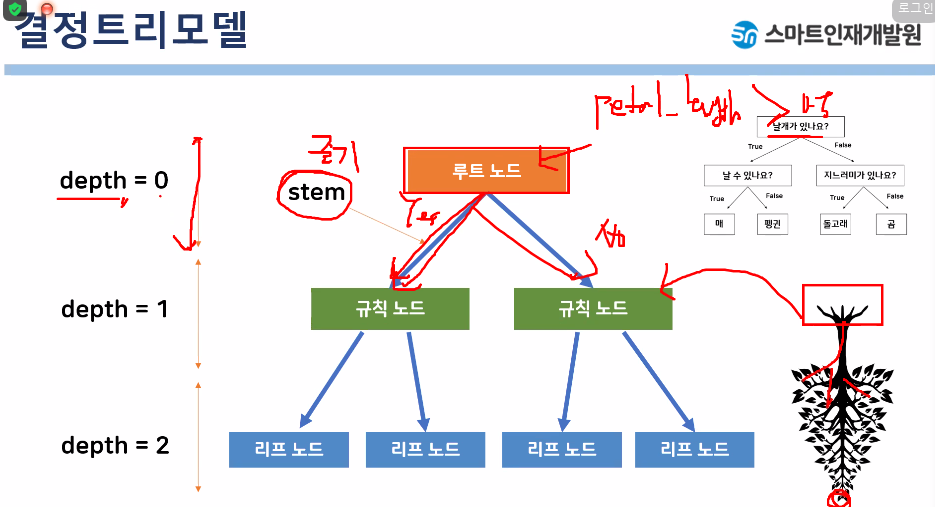
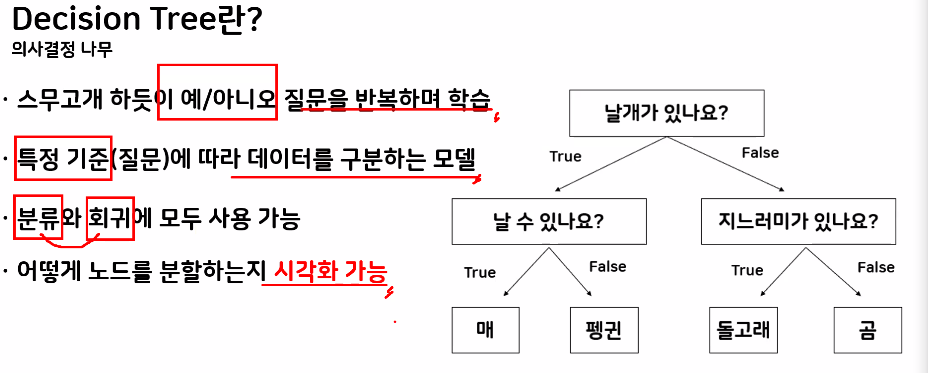
- knn 의 같은 경우 시각화가 안되서 구분이 잘 안가지만
- Decision Tree는 어떤 질문으로 분류를 했는지 한눈에 볼 수 있게 그래프로 그려줌
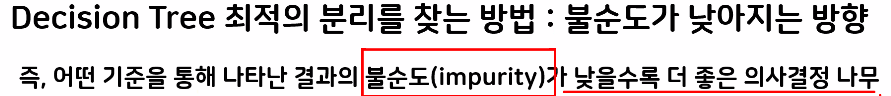

## 목표
- 버섯의 특징을 활용하여 독/식용 버섯을 분류
- DecisionTree 시각화 & 과대적합 속성 제어

In [1]:
#1. 데이터를 로딩
#2. 전체 컬럼, 행 숫자 파악
#3. 결측치 파악
#4. 문제와 답 분리
#5. 기술통계 -> 범주형 데이터(=문자열 데이터) : 갯수, 최빈값, 종류
#6.  label의 비율을 확인

In [3]:
# 라이브러리
import pandas as pd

# mushroom.csv 파일 가져오기
data = pd.read_csv('mushroom.csv')
data

poisonous cap-shape cap-surface cap-color bruises  ... ring-number ring-type spore-print-color population habitat
0            p         x           s         n       t  ...           o         p                 k          s       u
1            e         x           s         y       t  ...           o         p                 n          n       g
2            e         b           s         w       t  ...           o         p                 n          n       m
3            p         x           y         w       t  ...           o         p                 k          s       u
4            e         x           s         g       f  ...           o         e                 n          a       g
...        ...       ...         ...       ...     ...  ...         ...       ...               ...        ...     ...
8119         e         k           s         n       f  ...           o         p                 b          c       l
8120         e         x           s         n       f  ...           o         p                 b          v       l
8121         e         f           s         n       f  ...           o         p                 b          c       l
8122         p         k           y         n       f  ...           o         e                 w          v       l
8123         e         x           s         n       f  ...           o         p                 o          c       l

[8124 rows x 23 columns]

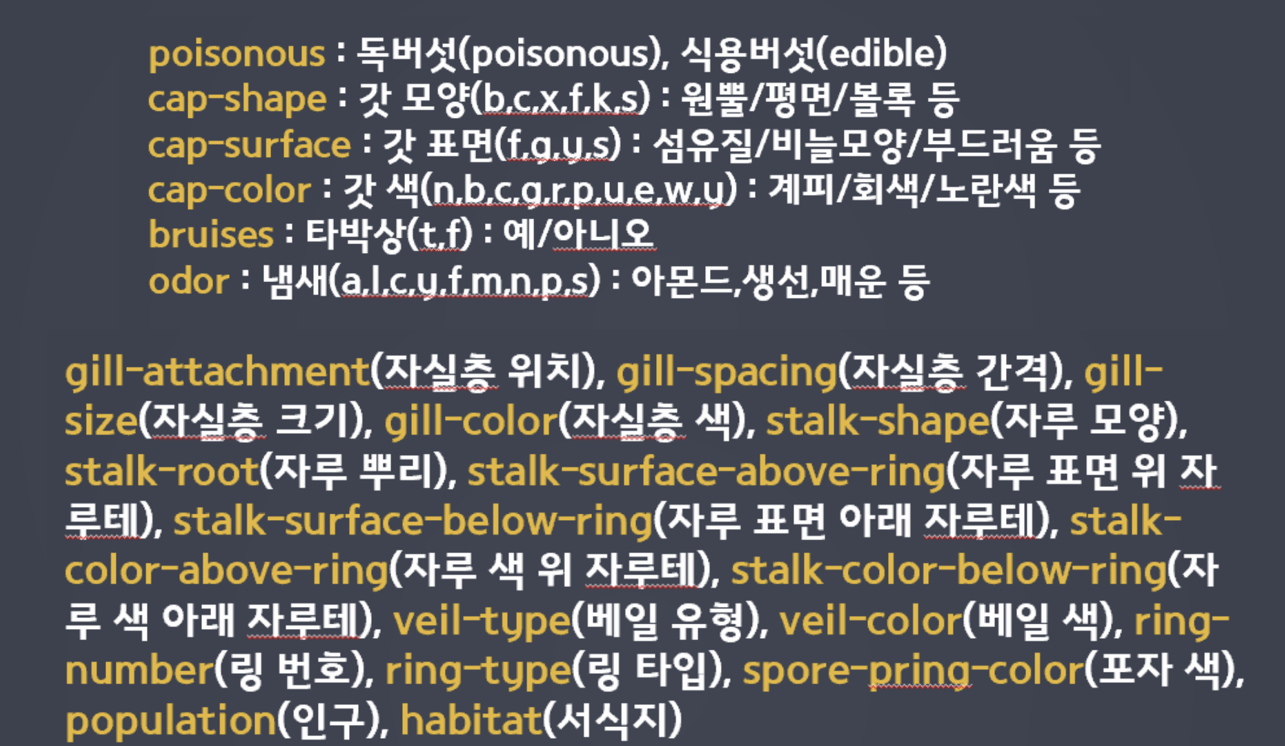

In [8]:
# data의 크기 , 모양 확인
data.shape

(8124, 23)

In [10]:
# data의 결측치/행 개수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  


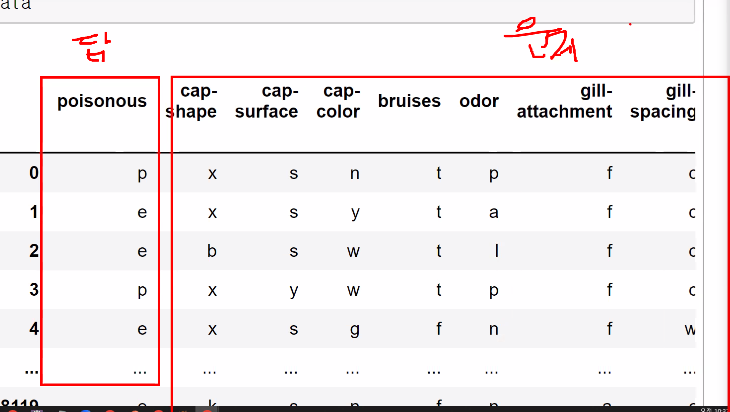
## 문제와 답 데이터로 분리 -> loc, iloc 인덱서 활용
- 문제 = X
- 답 = y


In [24]:
# 답 (독성이 있는지)
# y = data.loc[:,'poisonous'] 를 아래처럼 그냥 표현해도됌
y=data['poisonous']
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

In [22]:
# 문제
X = data.iloc[:,2:]
X

cap-surface cap-color bruises odor gill-attachment  ... ring-number ring-type spore-print-color population habitat
0              s         n       t    p               f  ...           o         p                 k          s       u
1              s         y       t    a               f  ...           o         p                 n          n       g
2              s         w       t    l               f  ...           o         p                 n          n       m
3              y         w       t    p               f  ...           o         p                 k          s       u
4              s         g       f    n               f  ...           o         e                 n          a       g
...          ...       ...     ...  ...             ...  ...         ...       ...               ...        ...     ...
8119           s         n       f    n               a  ...           o         p                 b          c       l
8120           s         n       f    n               a  ...           o         p                 b          v       l
8121           s         n       f    n               a  ...           o         p                 b          c       l
8122           y         n       f    y               f  ...           o         e                 w          v       l
8123           s         n       f    n               a  ...           o         p                 o          c       l

[8124 rows x 21 columns]

In [27]:
# y(답)데이터에서 p와 e의 개수 확인 -> .value_counts() 메소드 사용
# e(edible) : 식용버섯
# p(poisonous) : 독 버섯
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

# 함수
print() <- 안에 매개변수 들어감, 기능이 있음
# 메소드
어떤 것(데이터프레임..등등)이 가지고 있는 기능  

예) `value_counts() 만 단독으로 사용 불가능`  

`y 라는 시리즈가 사용하겠습니다` 라고 명시해줘야함  

`y.value_counts()`

In [29]:
# 범주형 데이터 기술 통계 확인
data.describe()
# 중복을 제거한 컬럼 개수
# top - 최빈값
# freq - 최빈값의 빈도수

poisonous cap-shape cap-surface cap-color bruises  ... ring-number ring-type spore-print-color population habitat
count       8124      8124        8124      8124    8124  ...        8124      8124              8124       8124    8124
unique         2         6           4        10       2  ...           3         5                 9          6       7
top            e         x           y         n       f  ...           o         p                 w          v       d
freq        4208      3656        3244      2284    4748  ...        7488      3968              2388       4040    3148

[4 rows x 23 columns]

# 인코딩 
### 문자열 -> 숫자형 
- 레이블 인코딩 / 원핫인코딩 
  
- 레이블 인코딩  
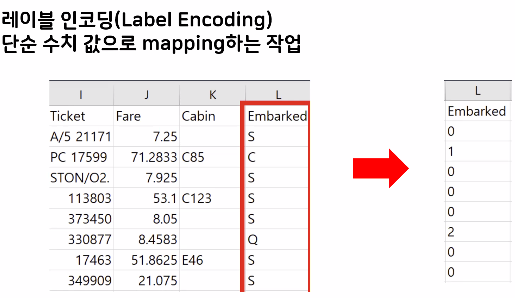  
- 원핫인코딩 : 정확성은 올라가지만 데이터효율(양이 늘어남)이 비교적 떨어짐
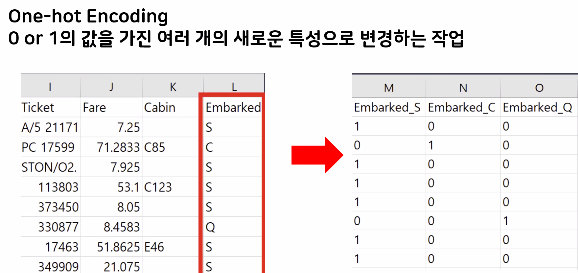

### 레이블 인코딩
- 단순 수치 값으로 mapping하는 작업
- 숫자 값의 크고 작음에 대한 특성으로 인해 예측성능이 떨어지는 경우가 발생함

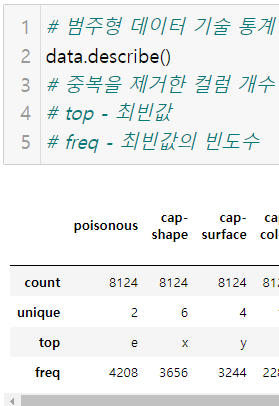
## 위에서 unique 행은 describe 메소드에서 제공되는 행의 이름임

# 레이블 인코딩 방법 1

In [33]:
# 1. habitat 특성(컬럼)에서 데이터의 중복을 제거한 값 확인 -> .unique() 메소드 사용
data['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [37]:
# 2. habitat 특성(컬럼)에서 데이터의 중복을 제거한 값 확인 -> .unique() 메소드 사용
data.loc[ : , 'habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

### 매핑 : 데이터를 연결한다 (ex) u-1, g-2 ,...)
-> 딕셔너리 (key : value ) 자료형태가 좋음

In [38]:
# 매핑 
habitat_dict = {
    'u' : 2,
    'g' : 1,
    'm' : 3,
    'd' : 5,
    'p' : 4,
    'w' : 6,
    'l' : 7
}
habitat_dict

{'u': 2, 'g': 1, 'm': 3, 'd': 5, 'p': 4, 'w': 6, 'l': 7}

In [40]:
# mapping -> .map() 메소드 사용
X['habitat'].map(habitat_dict)

0       2
1       1
2       3
3       2
4       1
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

# 레이블 인코딩 방법2 : LableEncoder 사용(sklearn)

In [42]:
from sklearn.preprocessing import LabelEncoder

items = X['habitat'].unique()

# LabelEncoder를 객체로 생성
encoder = LabelEncoder()

#.fit() : 레이블 인코더를 학습시킴
encoder.fit(items)

# .transfrom() : 학습된 인코더를 사용하여 데이터를 변환
labels = encoder.transform(items)

print('인코딩 변환값 :' ,labels)

인코딩 변환값 : [5 1 3 0 4 6 2]


In [45]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['d' 'g' 'l' 'm' 'p' 'u' 'w']


## 원핫 인코딩
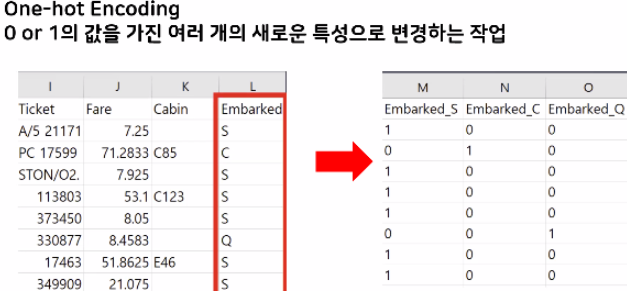
- 특성을 세부적으로 나눠서 생각할 수 있음
- 단어를 표현하는 가장 기본적인 표현 방법
- 필요한 공간이 계속 늘어나 저장 공간 측면에서는 비효율적인 방법

In [47]:
# get_dummies() 메소드 활용 -> pandas 라이브러리에서 제공해줌
X_one_hot = pd.get_dummies(X) # 0과 1로만 이루어진 열을 생성
X_one_hot

cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  ...  habitat_m  habitat_p  habitat_u  habitat_w
0                 0              0              1              0  ...          0          0          1          0
1                 0              0              1              0  ...          0          0          0          0
2                 0              0              1              0  ...          1          0          0          0
3                 0              0              0              1  ...          0          0          1          0
4                 0              0              1              0  ...          0          0          0          0
...             ...            ...            ...            ...  ...        ...        ...        ...        ...
8119              0              0              1              0  ...          0          0          0          0
8120              0              0              1              0  ...          0          0          0          0
8121              0              0              1              0  ...          0          0          0          0
8122              0              0              0              1  ...          0          0          0          0
8123              0              0              1              0  ...          0          0          0          0

[8124 rows x 111 columns]

In [51]:
# 원핫인코딩 이전과 원핫인코딩 이후 특성 비교하기
# 특성 -> 컬럼
print("원핫 인코딩 이전 특성 : \n", X.columns)
print("원핫 인코딩 이후 특성 : \n", X_one_hot.columns)

원핫 인코딩 이전 특성 : 
 Index(['cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')
원핫 인코딩 이후 특성 : 
 Index(['cap-surface_f', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_b', 'cap-color_c', 'cap-color_e', 'cap-color_g',
       'cap-color_n', 'cap-color_p',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=111)


# 모델링

In [62]:
# train_test_split 불러오기
from sklearn.model_selection import train_test_split
# 문제(X_one_hot)와 답 데이터(y)를 훈련셋과 테스트 셋 ( 7 : 3 ) 으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_one_hot,
                                                            y,
                                                            test_size = 0.3)

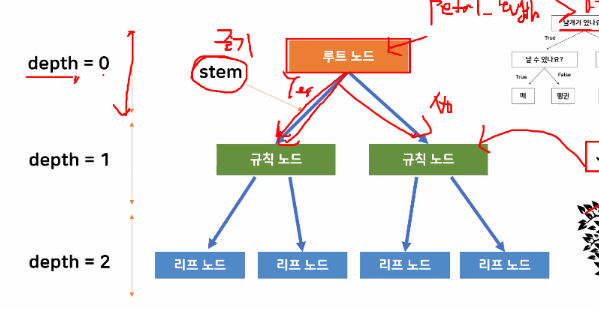
- max_depth = 3 => 트리가 더이상 자라지 않도록 깊게 설정

In [63]:
# 사이킷런 라이브러리<-결정트리 모델 생성
from sklearn.tree import DecisionTreeClassifier
# 결정트리 모델 생성 - tree 라는 변수에 담아주기
tree = DecisionTreeClassifier(max_depth = 3)
tree

DecisionTreeClassifier(max_depth=3)

# `모델 생성할 때` = `모델을 호출한다`
## -> 모델명을 그대로 적고 () 붙이면 됨
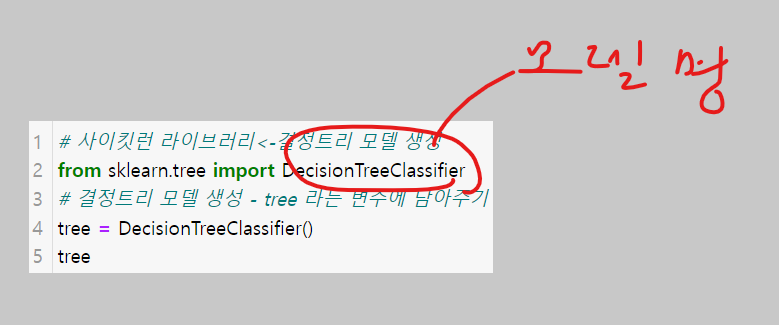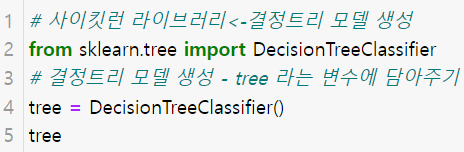

In [64]:
# 훈련 - .fit() 메소드 활용
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [72]:
# 예측하기 - predict() 메소드 활용
pre = tree.predict(X_test)

In [74]:
# 정확도 평가

# 평가하는 함수 불러오기
from sklearn import metrics

# metrics / accuracy_score 함수 사용
print("예측 정확도 : " , metrics.accuracy_score(pre, y_test))

예측 정확도 :  0.9823625922887613
